In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
df = pd.read_excel("natural_gas.xlsx")
df.head()

,Consumption,Temperature
0,551547920.0,6.741935
1,551886440.0,5.857143
2,513182950.0,7.225806
3,281495382.0,12.566667
4,138625166.0,17.225806


In [4]:
# Standardization process
from sklearn.preprocessing import StandardScaler
df = pd.read_excel("natural_gas.xlsx")

scaler = StandardScaler()
scaler.fit(df.iloc[:-12, :])

df = scaler.transform(df)


#df = pd.read_excel("natural_gas.xlsx")
#mu = df.iloc[: -12, :].mean()
#sigma = df.iloc[: -12, :].std()
#df = (df - mu)/ sigma

In [5]:

time_index = pd.date_range("2004-01-01",  periods = len(df), freq= "MS")
time_index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01'],
              dtype='datetime64[ns]', length=130, freq='MS')

In [6]:
df = pd.read_excel('natural_gas.xlsx')
df["year"] = time_index.year
df["month"] = time_index.month.astype(str)
df = pd.get_dummies(df, drop_first = True, dtype = "int")


In [7]:
scaler = StandardScaler()
scaler.fit(df.iloc[: -12, :])
df = scaler.transform(df)
df


array([[ 0.74673476, -1.24252117, -1.56005194, ..., -0.30429031,
        -0.30429031, -0.30429031],
       [ 0.74806104, -1.36509956, -1.56005194, ..., -0.30429031,
        -0.30429031, -0.30429031],
       [ 0.59642615, -1.17548612, -1.56005194, ..., -0.30429031,
        -0.30429031, -0.30429031],
       ...,
       [-0.81840229,  1.61764123,  1.96650225, ..., -0.30429031,
         3.28633535, -0.30429031],
       [-0.81381018,  1.16686771,  1.96650225, ..., -0.30429031,
        -0.30429031,  3.28633535],
       [-0.29164949,  0.22778106,  1.96650225, ..., -0.30429031,
        -0.30429031, -0.30429031]])

In [13]:
import numpy as np
import pandas as pd

def make_data(data, lag = 3, target_col = 0, period = 2):
    """
    Splits time series data into lagged features (X) and targets (y).

    Args:
        data (np.ndarray): The time series data.
        lag (int): The lag interval, default is 12.

    Returns:
        Tuple[np.ndarray, np.ndarray]: 
            - X (np.ndarray): The array containing lagged features.
            - y (np.ndarray): The array containing target values to predict.
    """
    X = []
    y = []

    # Iterate over the data to create lagged features and targets.
    # Convert lists to NumPy arrays and return them.
    for i in range(len(data) - lag - period + 1):
        X.append(data[i : i + lag] ) 
        y.append(data[i + lag : i + lag + period, target_col])      
   
    return np.array(X), np.array(y)


# Generate the lagged dataset using the first column of the DataFrame.
X, y = make_data(df, lag = 12, target_col = 0, period = 12)  # Convert the first column to a NumPy array

#X = X[..., np.newaxis]

print(X.shape)  
print(y.shape)  


(107, 12, 14)
(107, 12)


In [14]:
# Defining train and test values
X_train = X[:-1]
y_train = y[:-1]
X_test = X[-1:]
y_test = y[-1:]

In [18]:
# Create model
mdl = keras.Sequential()

# Add Dense layer to reduce to a single output
mdl.add(layers.LSTM(128, input_shape = X_train.shape[1:]))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(12, activation = "linear"))

# Compile the model
mdl.compile(optimizer = "adam", loss = "mse", metrics = ["mape"])

# Fit the model
mdl.fit(X_train, y_train, epochs = 30, verbose = 0)

# Predict model 
y_pred = mdl.predict(X_test)

y_pred = y_pred.ravel()
y_test = y_test.ravel()

print(r2_score(y_test, y_pred))


C:\Users\Hefes\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
0.946552067510561


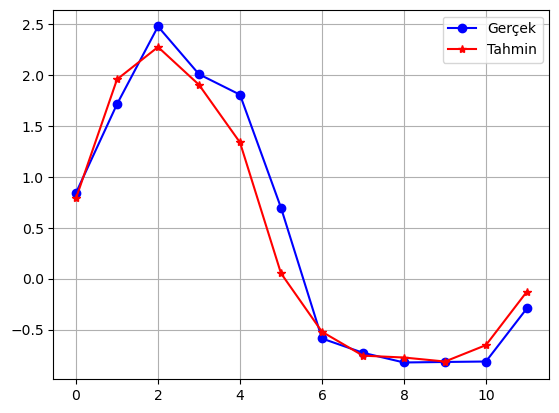

In [17]:
plt.plot(y_test, "-ob", label = "Gerçek")
plt.plot(y_pred, "-*r", label = "Tahmin")
plt.legend()
plt.grid()
